<a href="https://colab.research.google.com/github/samvalentim/CursoCienciasDeDados/blob/main/Projeto_I_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

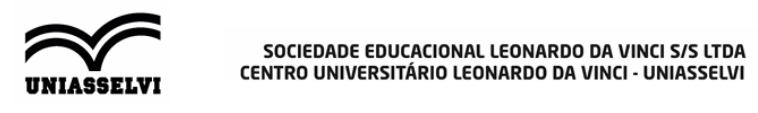

**Nome do Acadêmico:** Samantha Monteiro Valentim

**Matrícula:** 4479314



# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

>## Titanic

<p align="justify">
As ferramentas de Machine Learning permitem que os dados gerados pelas empresas sejam extraídos, transformados e carregados para uma análise exploratória ou preditiva das informações ali contidas.

Esse recurso é fundamental quando tratamos de um grande volume de dados, pois é inviável realizar uma análise assertiva de forma manual. Uma Análise de alta acurácia auxilia na tomada de decisões, levando as empresas a cultura Data Driven, ou seja, orientada por dados.

O uso do Python nos auxilia no processamento dos dados e na análise preditiva, para tal é necessário realizar experimentos de aprendizagem de máquina e avaliar a acurácia dos resultados.

O Titanic foi um navio britânico da White Star Line, que teve sua inauguração em 1911. Projetado para ser o mais luxuoso e seguro navio da época, trazia grandes rumores de ser inafundável, mas em sua primeira viagem chocou-se com um iceberg, que o levou ao fundo do mar. A história do navio foi contada em vários livros e no cinema, filme que ganhou vários Oscars e por muitos anos permaneceu em primeiro lugar como película de maior bilheteria da história do cinema.


>## Objetivo


Esse projeto tem como objetivo aplicar algoritmos de machine learning na análise da probabilidade de sobrevivência dos passageiros do Titanic.

>## Especificação Técnica

<p align="justify">

**Dataset:**
Para desenvolvimento desse projeto, será utilizado dataset com informações sobre os tripulantes do navio Titanic. Os dados estão disponíveis em: < https://www.kaggle.com >.

**Formato:**
A base de dados para treino e para teste estão formados por 2 arquivos em CSV contendo 11 colunas, que são: PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked  

**DESCRIÇÃO DAS FEATURES:**

PassengerId - ID do passageiro

Pclass - Classe do passageiro (1 = 1º, 2 = 2º, 3 = 3º)

Name - Nome do passageiro

Sex - Sexo do passageiro

Age - Idade do passageiro

SibSp - Quantos irmãos / cônjuges (Sibling = Irmão, irmã, Spouse (Cônjuge) = marido, esposa )

Parch - Quantos pais / crianças a bordo do Titanic

Ticket - Bilhete

Fare - Tarifa

Cabin - Cabine

Embarked  - Ponto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


**Tarefa de Aprendizado:** Classificação

**Modos de aprendizado:** Supervisionado



>## Pré-Processamento


Importação das bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



Carregamento dos dados e divisão de features

In [9]:
data = pd.read_csv('train.csv')
X = data.drop('Survived', axis=1)
y = data['Survived']

Pré processamento realizado em 4 etapas
1. Limpeza de dados ausentes
2. Transformar variáveis categóricas em variáveis numéricas
3. Limpeza de dados sem impacto nos resultados
4. Divisão dos dados em treino e teste

In [ ]:
# valores ausentes
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# variáveis categóricas em numéricas
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

# colunas irrelevantes
X = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Visualização de dados

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [ ]:
# head
print(data.head(20))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

In [ ]:
# descriptions
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


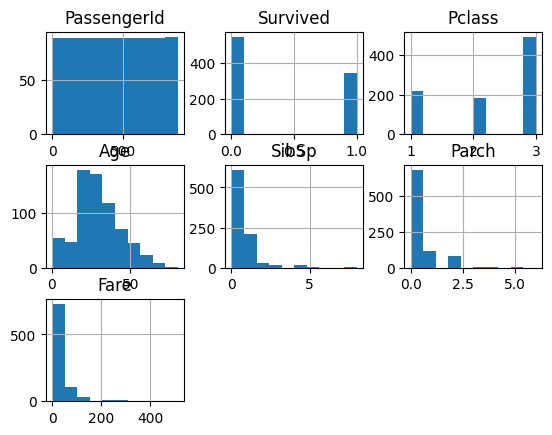

In [ ]:
# histograma
data.hist()
plt.show()

>## Métodos de Machine Learning

1. Regressão Logística

A regressão logística utiliza a matemática para encontrar relações entre dois fatores de dados. Essa relação prevê o valor de um dos fatores com embasamento no outro. A previsão geralmente é finita e é um método menos complexo de aprendizado de máquina.

  1.1. baixar biblioteca sklearn

  1.2. criação do modelo de Regressão Logística

  1.3. Treino do modelo

  1.4. Previsão dos dados de teste
  
  1.5. Verificação da acurácia

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# modelo de Regressão Logística
logreg = LogisticRegression()

# treino do modelo
logreg.fit(X_train, y_train)

# previsões nos dados de teste
y_pred = logreg.predict(X_test)

# acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia da Regressão Logística:", accuracy)

Acurácia da Regressão Logística: 0.8100558659217877


2. Árvore de Decisão

Esse método de aprendizagem de máquina é usado para classificação e regressão com intuito de prever categorias discretas e também valores numéricos.

Bem semelhante a um fluxograma padrão, esse método usa nós (decision nodes) relacionados por hierarquia. Há o nó-raiz (root node), que é o atributo da base de dados, e os nós-folha (leaf nodes), que é a classe ou o valor gerado como resposta.

  2.1. Baixar biblioteca sklearn

  2.2. Criação do modelo de Árvore de Decisão

  2.3. Previsão dos dados de teste

  2.4. Verificação da acurácia

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# modelo de Árvore de Decisão
tree = DecisionTreeClassifier()

# Treino do modelo
tree.fit(X_train, y_train)

# previsões nos dados de teste
y_pred = tree.predict(X_test)

# acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia da Árvore de Decisão:", accuracy)


Acurácia da Árvore de Decisão: 0.7821229050279329


3. Random Forest

A tradução literal de Random Forest é floresta aleatória, como o próprio nome sugere, esse método se utiliza de princípios da árvore de decisão e utiliza a aleatoriedade para alcançar seus resultados ao esquematizar pequenas árvores randomicas.

  3.1. Baixar biblioteca sklearn

  3.2. Criação do modelo de Árvore de Decisão

  3.3. Previsão dos dados de teste

  3.4. Verificação da acurácia

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# modelo de Random Forest
forest = RandomForestClassifier()

# treino o modelo
forest.fit(X_train, y_train)

# previsões nos dados de teste
y_pred = forest.predict(X_test)

# acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Random Forest:", accuracy)


Acurácia do Random Forest: 0.8156424581005587


Como é possível observar nos dados visualizados, a maioria dos passageiros do Titanic não sobreviveram (61,6%), com destaque para os passageiros de 3° classe, onde estavam a maioria dos que não sobreviveram. 40% dos sobreviventes eram da 1° Classe. 65% dos passageiros eram do sexo masculino, mas a maioria dos sobreviventes eram do sexo feminino, provavelmente diante da política de salvamento que prioriza mulheres e crianças.

Com a utilização dos três métodos de Machine Learning, elencamos a ordem de acurácia da seguinte forma: em primeiro lugar tivemos a acurária de 0,815 da Random Forest, 0,810 da Regressão Logística e 0,783 da Árvore de decisões.